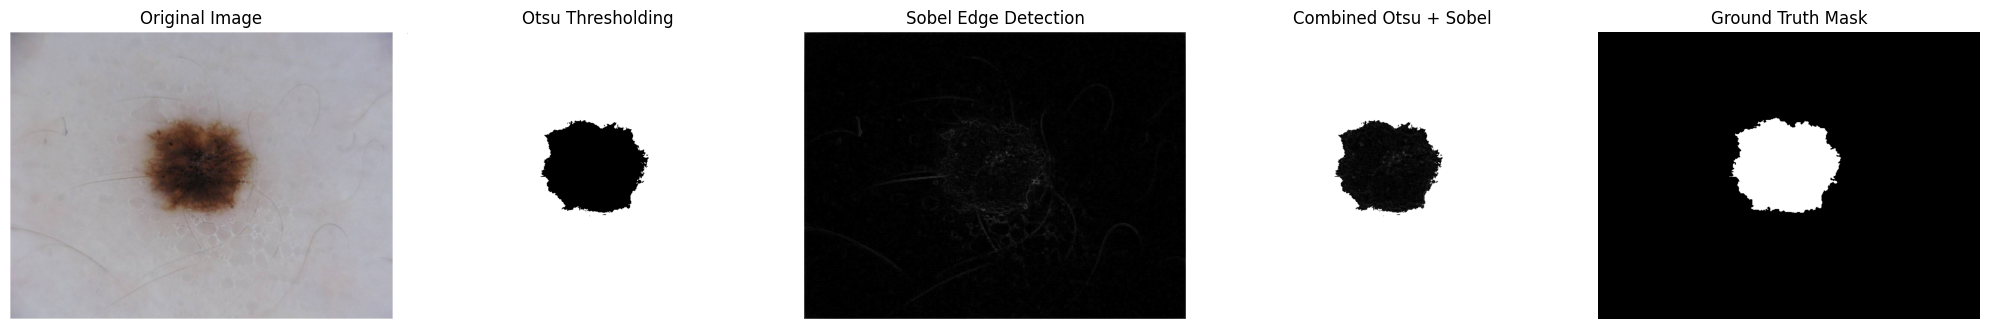

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dataset paths
train_images_dir = 'skin_dataset/ISIC2018_Task1-2_Training_Input'
train_masks_dir = 'skin_dataset/ISIC2018_Task1_Training_GroundTruth'

def load_image_and_mask(image_id):
    """
    Load an image and its corresponding mask using the given ID.
    """
    image_path = os.path.join(train_images_dir, f"{image_id}.jpg")
    mask_path = os.path.join(train_masks_dir, f"{image_id}_segmentation.png")

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    return image, mask

def apply_otsu_sobel(image):
    """
    Apply Otsu's thresholding and Sobel edge detection,
    then combine both into a single image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Otsu's Thresholding
    _, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    sobel_edges = np.uint8(sobel_edges / sobel_edges.max() * 255)

    # Compute the gradient magnitude
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the result to 0-255
    sobel_normalized = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert to uint8 for visualization
    sobel_uint8 = sobel_normalized.astype(np.uint8)

    # Combine Otsu and Sobel
    combined = cv2.bitwise_or(otsu_thresh, sobel_uint8)

    return otsu_thresh, sobel_uint8, combined

def visualize_results(image, otsu, sobel, combined, mask):
    """
    Visualize the original image, Otsu thresholding, Sobel edges, and their combination.
    """
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(otsu, cmap='gray')
    plt.title("Otsu Thresholding")
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(sobel, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(combined, cmap='gray')
    plt.title("Combined Otsu + Sobel")
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(mask, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_id = 'ISIC_0000001'  # Replace with any image ID from the dataset
image, mask = load_image_and_mask(image_id)
otsu_thresh, sobel_edges, combined = apply_otsu_sobel(image)

visualize_results(image, otsu_thresh, sobel_edges, combined, mask)
